In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

In [3]:
import os

import sys
sys.path.append(os.path.join(os.environ['GORDON_REPO_DIR'], 'utilities'))
from utilities2015 import *

sys.path.append('/home/yuncong/project/opencv-2.4.9/release/lib/python2.7/site-packages')
import cv2

from joblib import Parallel, delayed

import matplotlib.pyplot as plt
%matplotlib inline

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/numpy/lib/utils.py:95: DeprecationWarning: `scipy.lib.lapack` is deprecated, use `scipy.linalg.lapack` instead!
  warnings.warn(depdoc, DeprecationWarning)


In [4]:
img = imread('/home/yuncong/CSHL_data_processed/MD593_lossless_aligned_cropped_grayscale/MD593_0130_lossless_aligned_cropped_grayscale.tif')

In [5]:
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=100, random_state=rng, verbose=True)
patch_size = (50, 50)

In [59]:
data = extract_patches_2d(img[:10000, :10000], patch_size, max_patches=10000, random_state=rng)
data = np.reshape(data, (len(data), -1))

In [231]:
# data -= np.mean(data, axis=0)
# data /= np.std(data, axis=0)
kmeans.fit(data)

Init 1/3 with method: k-means++
Inertia for init 1/3: 315533127.180809
Init 2/3 with method: k-means++
Inertia for init 2/3: 322128865.354457
Init 3/3 with method: k-means++
Inertia for init 3/3: 339783167.843670
Minibatch iteration 1/50000:mean batch inertia: 2113309.370315, ewa inertia: 2113309.370315 
Minibatch iteration 2/50000:mean batch inertia: 1869634.813002, ewa inertia: 2112334.691579 
Minibatch iteration 3/50000:mean batch inertia: 2341873.877599, ewa inertia: 2113252.829960 
Minibatch iteration 4/50000:mean batch inertia: 2054310.211571, ewa inertia: 2113017.064202 
Minibatch iteration 5/50000:mean batch inertia: 2148760.142719, ewa inertia: 2113160.033657 
Minibatch iteration 6/50000:mean batch inertia: 2098983.505949, ewa inertia: 2113103.328680 
Minibatch iteration 7/50000:mean batch inertia: 1832333.085101, ewa inertia: 2111980.270167 
Minibatch iteration 8/50000:mean batch inertia: 1829971.338456, ewa inertia: 2110852.257000 
Minibatch iteration 9/50000:mean batch iner

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=3,
        random_state=<mtrand.RandomState object at 0x8bfea10>,
        reassignment_ratio=0.01, tol=0.0, verbose=True)

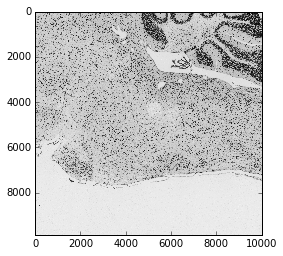

In [232]:
plt.imshow(img[:10000, :10000], cmap=plt.cm.gray);

In [233]:
valid = np.where(np.bincount(kmeans.labels_))[0]

In [236]:
valid_centers = kmeans.cluster_centers_[valid]

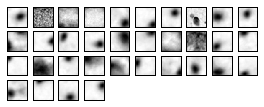

In [237]:
# Plot the results
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(valid_centers):
    plt.subplot(10, 10, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [240]:
D = np.array([valid_centers[i] for i in range(len(valid_centers)) if i not in [1,17]])

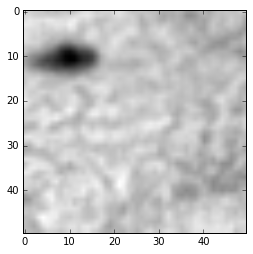

In [265]:
plt.imshow(data[5001].reshape(patch_size), cmap=plt.cm.gray);

In [243]:
from sklearn.decomposition import SparseCoder

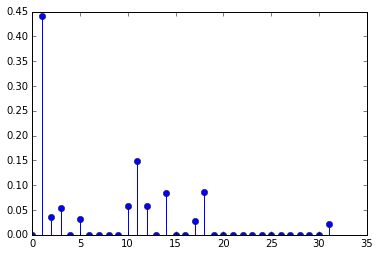

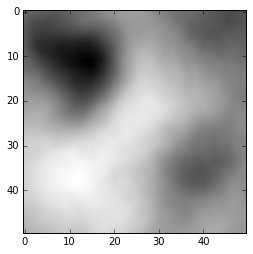

In [266]:
coder = SparseCoder(dictionary=D, transform_n_nonzero_coefs=2,
                    transform_alpha=100000, transform_algorithm='lasso_cd')

x = coder.transform(data[5001])
x_reconstructed = np.ravel(np.dot(x, D))

plt.figure();
plt.stem(x);

plt.figure()
plt.imshow(x_reconstructed.reshape(patch_size), cmap=plt.cm.gray)


In [7]:
from sklearn.decomposition import DictionaryLearning

In [60]:
dl = DictionaryLearning(n_components=100, alpha=10, max_iter=1, tol=1e-08, fit_algorithm='lars', 
                   transform_algorithm='lasso_cd', transform_n_nonzero_coefs=None, transform_alpha=None, 
                   n_jobs=1, code_init=None, dict_init=None, verbose=False, split_sign=False, random_state=None)

In [61]:
dl.fit(data)

DictionaryLearning(alpha=10, code_init=None, dict_init=None,
          fit_algorithm='lars', max_iter=1, n_components=100, n_jobs=1,
          random_state=None, split_sign=False, tol=1e-08,
          transform_algorithm='lasso_cd', transform_alpha=None,
          transform_n_nonzero_coefs=None, verbose=False)

In [62]:
dl.components_.shape

(100, 2500)

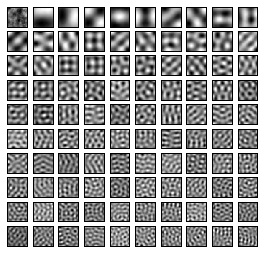

In [63]:
# Plot the results
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(dl.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

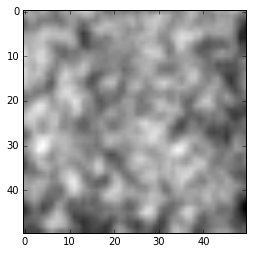

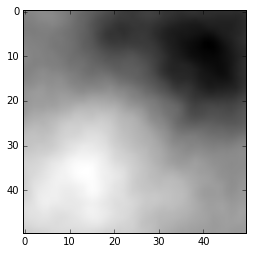

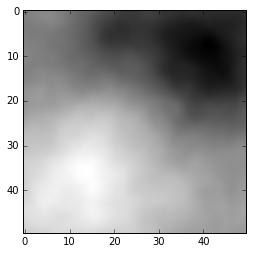

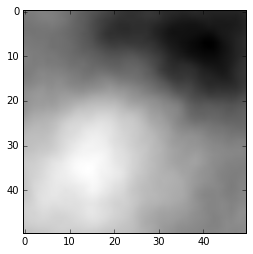

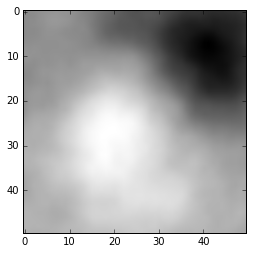

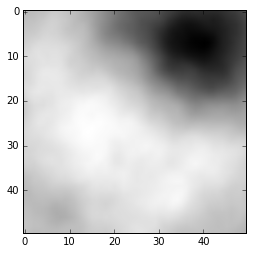

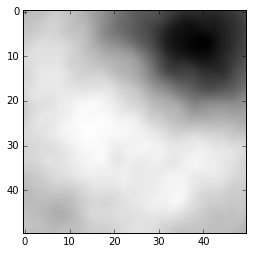

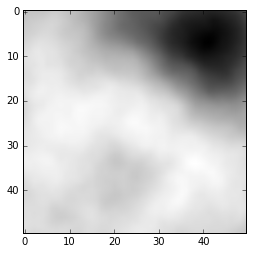

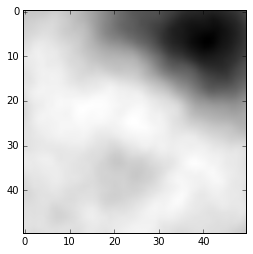

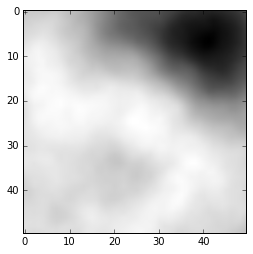

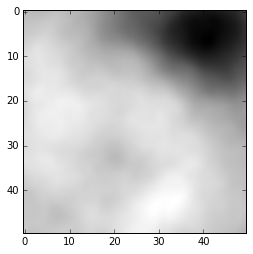

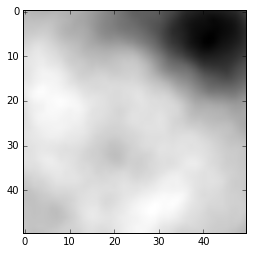

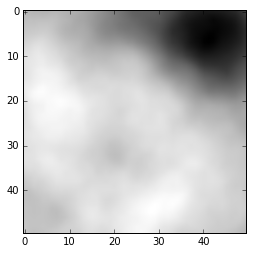

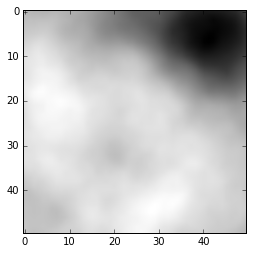

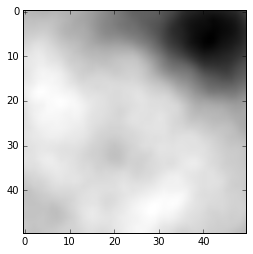

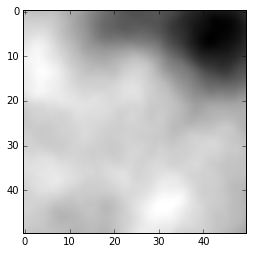

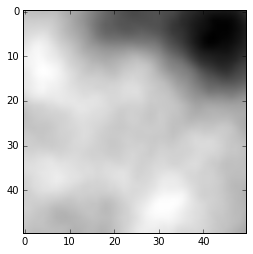

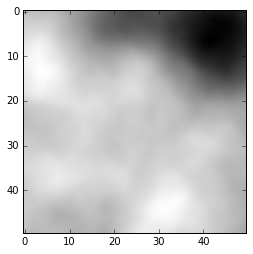

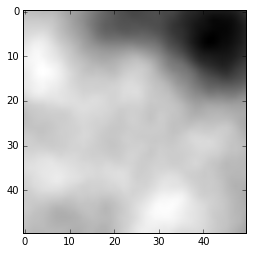

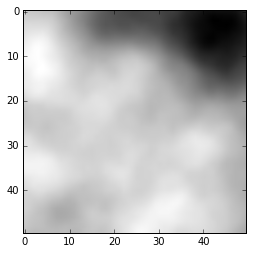

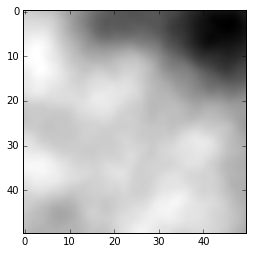

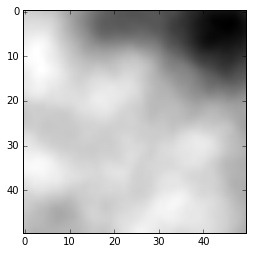

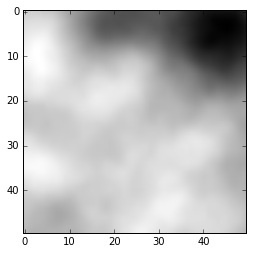

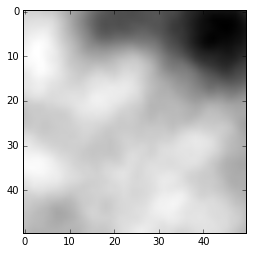

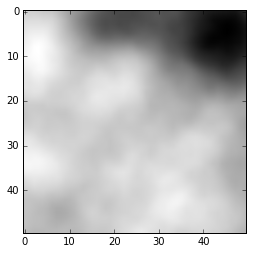

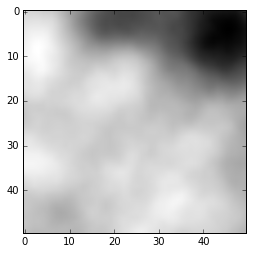

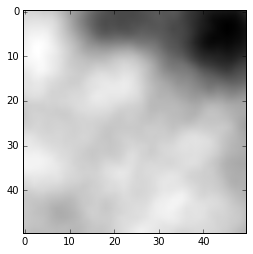

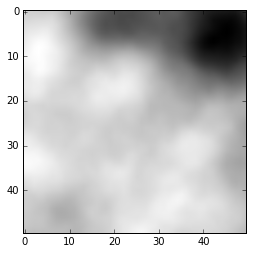

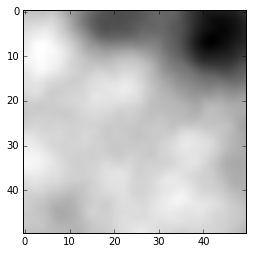

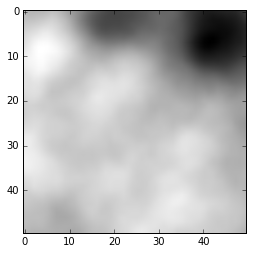

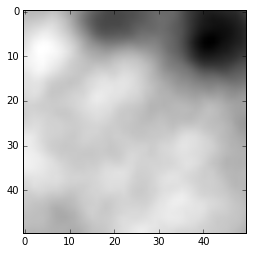

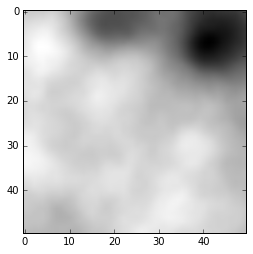

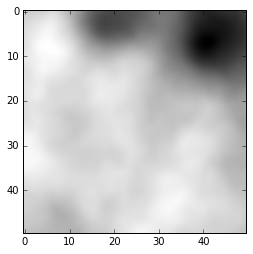

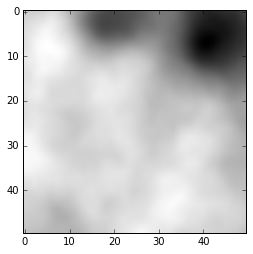

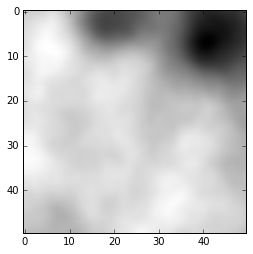

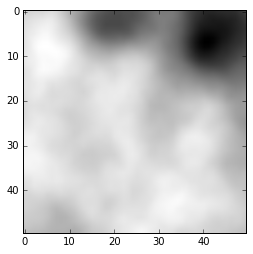

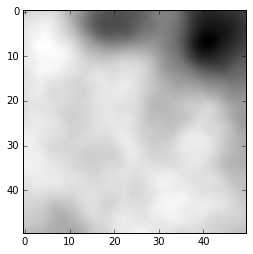

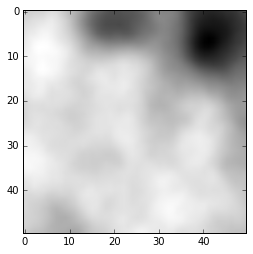

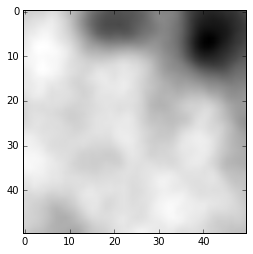

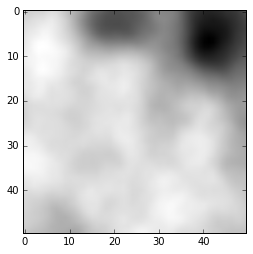

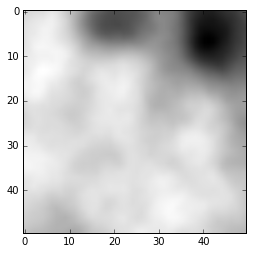

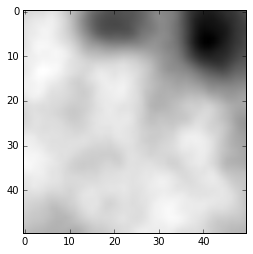

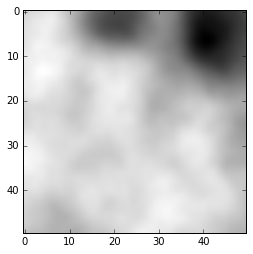

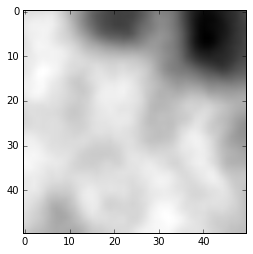

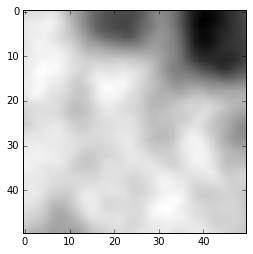

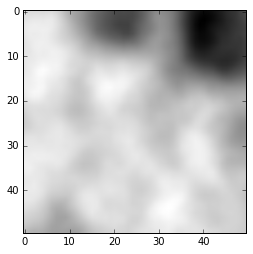

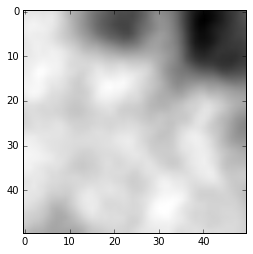

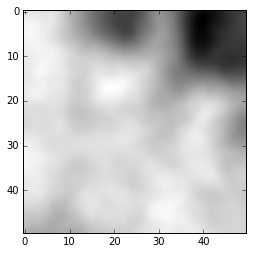

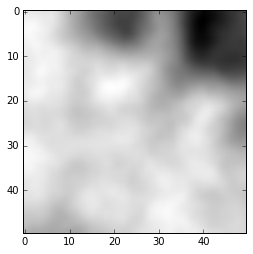

In [55]:
for i in range(1, 50):
    plt.figure();
    plt.imshow(np.dot(x[:i], dl.components_[:i]).reshape(patch_size), cmap=plt.cm.gray);

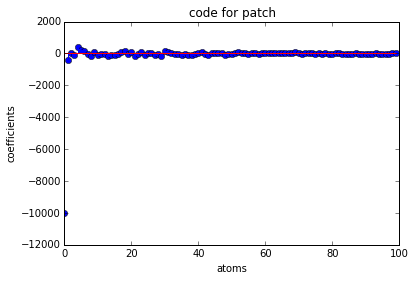

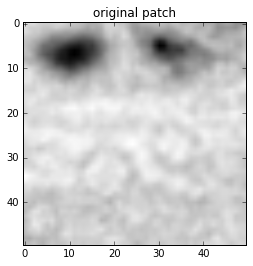

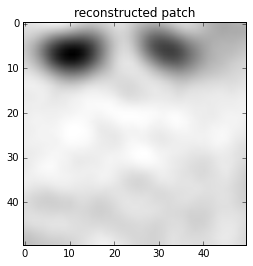

In [70]:
x = dl.transform(data[500])
reconstructed = np.ravel(np.dot(x, dl.components_))

plt.figure();
plt.stem(x);
plt.title('code for patch');
plt.ylabel('coefficients');
plt.xlabel('atoms');
plt.show();

plt.figure();
plt.imshow(data[500].reshape(patch_size), cmap=plt.cm.gray)
plt.title('original patch');
plt.show();

plt.figure();
plt.imshow(reconstructed.reshape(patch_size), cmap=plt.cm.gray)
plt.title('reconstructed patch');
plt.show();